# Bandit Problem

In [1]:
# imports
from bandits import Bandit
import random
# Include your imports here, if any are used. 
import numpy as np

import matplotlib.pyplot as plt 

A list of ten bandit objects initialized in the list...

In [2]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

In [3]:
bandits[0].pullLever()

-0.19717150803028793

## Greedy algorithm Implementation

In [4]:
#def run_greedy():
    # TODO: Implement the greedy algorithm here
    # Return the reward from the bandits in a list
    


def run_greedy(iterations=1000):
    n_bandits = len(bandits)
    q_estimates = np.zeros(n_bandits)
    n_counts = np.zeros(n_bandits)
    rewards = []

    for i in range(iterations):
        # Always pick the best known bandit
        action = np.argmax(q_estimates)
        
        reward = bandits[action].pullLever()
        rewards.append(reward)
        
        # Incremental update
        n_counts[action] += 1
        q_estimates[action] += (reward - q_estimates[action]) / n_counts[action]
        
    return rewards

Plot the cumulative average of rewards as the number of iterations increases.

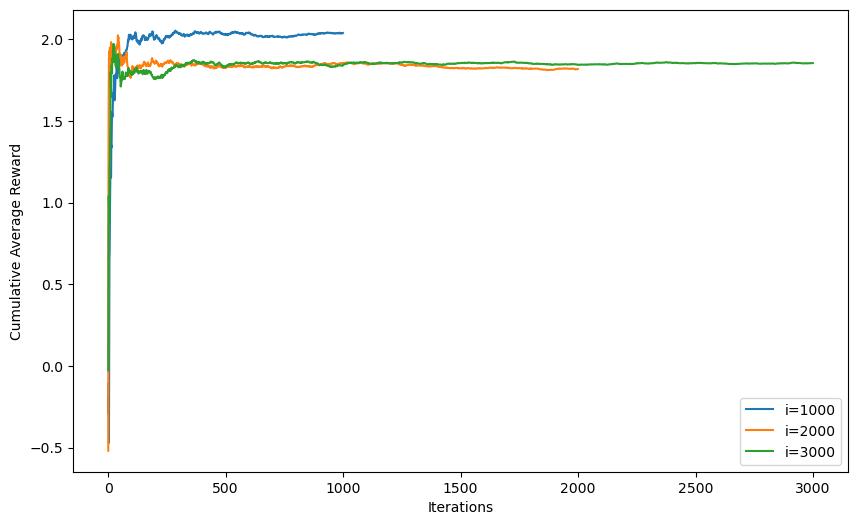

In [5]:


def plot_results(rewards_list, labels):
    plt.figure(figsize=(10, 6))
    for rewards, label in zip(rewards_list, labels):
        cumulative_average = np.cumsum(rewards) / (np.arange(len(rewards)) + 1)
        plt.plot(cumulative_average, label=label)
    
    plt.xlabel("Iterations")
    plt.ylabel("Cumulative Average Reward")
    plt.legend()
    plt.show()

#example
iteration = [1000,2000,3000]
results = [run_greedy(e) for e in iteration]
plot_results(results, [f"i={e}" for e in iteration])

## $\epsilon$-greedy Algorithm

In [6]:
#def run_epsilon_greedy(epsilon):
    # TODO: Implement the epsilon greedy algorithm here
    # Return the reward from the bandits in a list

def run_epsilon_greedy(epsilon, iterations=1000):
    n_bandits = len(bandits)
    q_estimates = np.zeros(n_bandits)
    n_counts = np.zeros(n_bandits)
    rewards = []

    for i in range(iterations):
        if random.random() < epsilon:
            action = random.randint(0, n_bandits - 1)
        else:
            action = np.argmax(q_estimates)
            
        reward = bandits[action].pullLever()
        rewards.append(reward)
        
        n_counts[action] += 1
        q_estimates[action] += (reward - q_estimates[action]) / n_counts[action]
        
    return rewards

Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

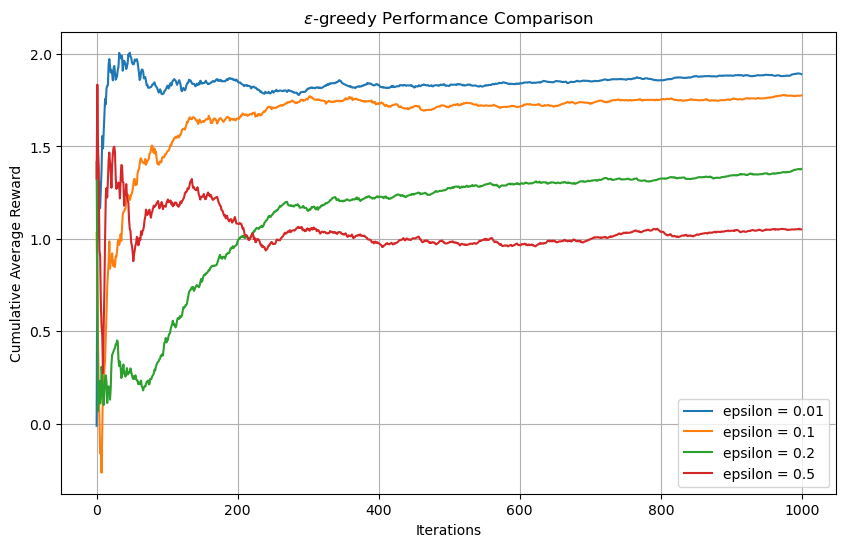

In [7]:


# Define various epsilon values to compare
epsilons = [0.01, 0.1, 0.2, 0.5]
iterations = 1000

plt.figure(figsize=(10, 6))

for eps in epsilons:
    # Run the epsilon-greedy algorithm for each epsilon
    rewards = run_epsilon_greedy(eps)
    
    # Calculate the cumulative average of rewards
    # Formula: sum(rewards[:t]) / t
    cumulative_avg = np.cumsum(rewards) / (np.arange(iterations) + 1)
    
    # Plot the results
    plt.plot(cumulative_avg, label=f'epsilon = {eps}')

# Formatting the plot
plt.xlabel("Iterations")
plt.ylabel("Cumulative Average Reward")
plt.title("$\\epsilon$-greedy Performance Comparison")
plt.legend()
plt.grid(True)
plt.show()

## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

## Optimistic Initial Values

In [8]:
#def run_optimistic_greedy():
    # TODO: Implement the optimistic greedy algorithm here

    # Return the reward from the bandits in a list
def run_optimistic_greedy(initial_q=10, iterations=1000):
    n_bandits = len(bandits)
    # Initialize with a high value to encourage exploration
    q_estimates = np.ones(n_bandits) * initial_q
    n_counts = np.zeros(n_bandits)
    rewards = []

    for i in range(iterations):
        action = np.argmax(q_estimates)
        
        reward = bandits[action].pullLever()
        rewards.append(reward)
        
        n_counts[action] += 1
        # Using a constant step size or the incremental update
        q_estimates[action] += (reward - q_estimates[action]) / n_counts[action]
        
    return rewards

Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$

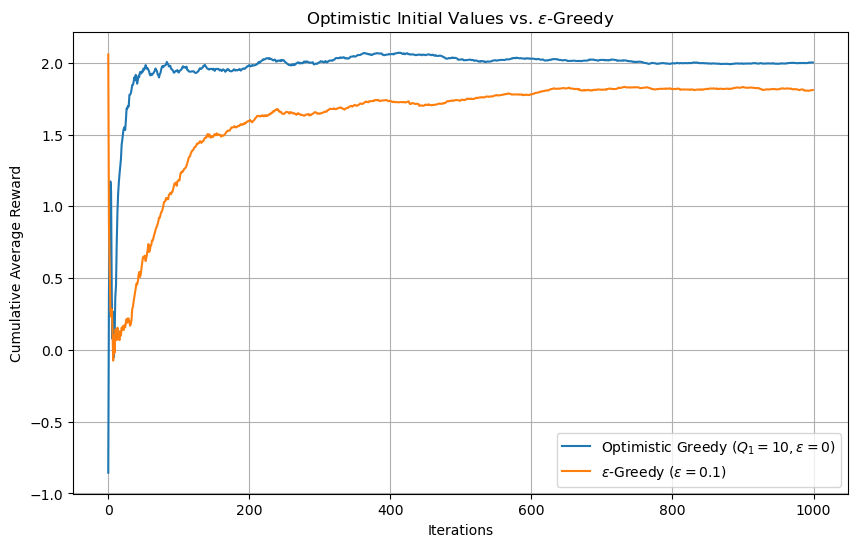

In [12]:


# 1. Run Optimistic Greedy (Q1 = 10)
# This assumes run_optimistic_greedy() is defined to use initial Q values of 10
opt_rewards = run_optimistic_greedy()
opt_cum_avg = np.cumsum(opt_rewards) / (np.arange(len(opt_rewards)) + 1)

# 2. Run Non-Optimistic Epsilon-Greedy (epsilon = 0.1)
eps_rewards = run_epsilon_greedy(0.1)
eps_cum_avg = np.cumsum(eps_rewards) / (np.arange(len(eps_rewards)) + 1)

# 3. Plotting the comparison
plt.figure(figsize=(10, 6))
plt.plot(opt_cum_avg, label='Optimistic Greedy ($Q_1=10, \\epsilon=0$)')
plt.plot(eps_cum_avg, label='$\\epsilon$-Greedy ($\\epsilon=0.1$)')

plt.xlabel("Iterations")
plt.ylabel("Cumulative Average Reward")
plt.title("Optimistic Initial Values vs. $\\epsilon$-Greedy")
plt.legend()
plt.grid(True)
plt.show()

## Optional - Upper Confidence Bound (UCB)

In [10]:
#def run_ucb(c):
    # TODO: Implement the UCB algorithm here
    # Return the reward from the bandits in a list
def run_ucb(c, iterations=1000):
    n_bandits = len(bandits)
    q_estimates = np.zeros(n_bandits)
    n_counts = np.zeros(n_bandits)
    rewards = []

    for t in range(1, iterations + 1):
        # If any bandit hasn't been pulled, pull it first to avoid division by zero
        if 0 in n_counts:
            action = np.where(n_counts == 0)[0][0]
        else:
            # UCB Formula: Q(a) + c * sqrt(ln(t) / N(a))
            upper_bound = q_estimates + c * np.sqrt(np.log(t) / n_counts)
            action = np.argmax(upper_bound)
            
        reward = bandits[action].pullLever()
        rewards.append(reward)
        
        n_counts[action] += 1
        q_estimates[action] += (reward - q_estimates[action]) / n_counts[action]
        
    return rewards

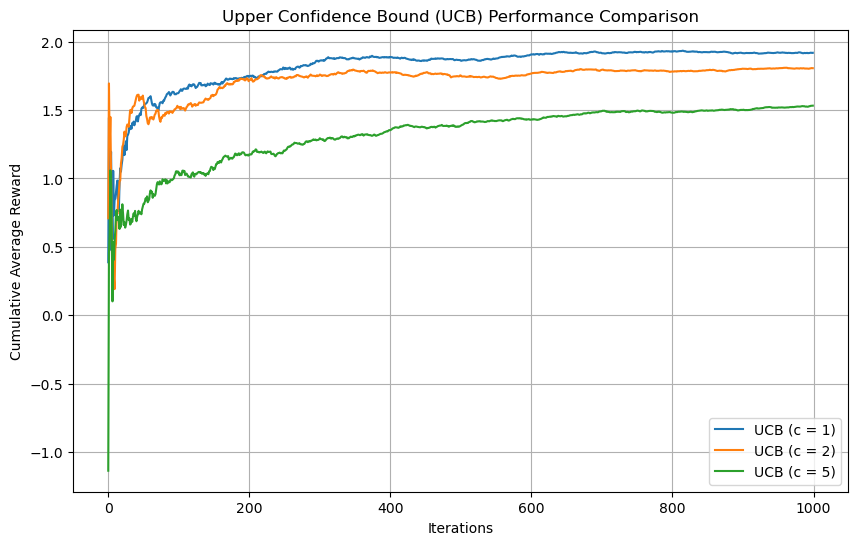

In [11]:


# Define various values for the exploration parameter 'c'
c_values = [1, 2, 5]
iterations = 1000

plt.figure(figsize=(10, 6))

for c in c_values:
    # Run the UCB algorithm for each 'c'
    # This assumes run_ucb(c) is already defined in your notebook
    rewards = run_ucb(c)
    
    # Calculate the cumulative average of rewards
    cumulative_avg = np.cumsum(rewards) / (np.arange(iterations) + 1)
    
    # Plot the results
    plt.plot(cumulative_avg, label=f'UCB (c = {c})')

# Formatting the plot
plt.xlabel("Iterations")
plt.ylabel("Cumulative Average Reward")
plt.title("Upper Confidence Bound (UCB) Performance Comparison")
plt.legend()
plt.grid(True)
plt.show()